In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
null_customers = df[df.CustomerID.isnull()]
null_customers.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [7]:
len(null_customers) / len(df)

0.249266943342886

In [8]:
len(df) / df['InvoiceNo'].nunique()

20.923127413127414

In [9]:
len(null_customers) / null_customers['InvoiceNo'].nunique()

36.40970350404313

In [10]:
df['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [11]:
null_customers['InvoiceNo'].nunique()

3710

In [12]:
codes, uniques = pd.factorize(null_customers.InvoiceNo)

In [13]:
codes

array([   0,    1,    1, ..., 3709, 3709, 3709], dtype=int64)

In [14]:
uniques

Index([536414, 536544, 536545, 536546, 536547, 536549, 536550, 536552, 536553,
       536554,
       ...
       581256, 581406, 581408, 581422, 581431, 581435, 581439, 581492, 581497,
       581498],
      dtype='object', length=3710)

In [15]:
len(codes) == len(null_customers)

True

In [16]:
null_customers.insert(7, "ImputedCustomerID", codes, True)
null_customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,1,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,1,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,1,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,1,United Kingdom


In [17]:
non_null_customers = df.dropna(axis=0, subset=['CustomerID'])

In [18]:
(len(non_null_customers) + len(null_customers)) == len(df)

True

In [19]:
non_null_customers.insert(7, "ImputedCustomerID", non_null_customers['CustomerID'], True)
non_null_customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,17850.0,United Kingdom


In [20]:
imputed_df = pd.concat([non_null_customers, null_customers], ignore_index=True)
imputed_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,17850.0,United Kingdom


In [21]:
len(imputed_df) == len(df)

True

In [22]:
imputed_df.describe()

,Quantity,UnitPrice,CustomerID,ImputedCustomerID
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,11952.768529
std,218.081158,96.759853,1713.600303,6004.960778
min,-80995.000000,-11062.060000,12346.000000,0.000000
25%,1.000000,1.250000,13953.000000,12352.000000
50%,3.000000,2.080000,15152.000000,14382.000000
75%,10.000000,4.130000,16791.000000,16255.000000
max,80995.000000,38970.000000,18287.000000,18287.000000


In [23]:
negativeUnitPrices = imputed_df[imputed_df['UnitPrice'] < 0]
negativeUnitPrices.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
490920,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,2498.0,United Kingdom
490921,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,2499.0,United Kingdom


In [41]:
zeroPrices = imputed_df[imputed_df['UnitPrice'] == 0]
zeroPrices.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,12647.0,Germany
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,16560.0,United Kingdom
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,14911.0,EIRE
29881,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,13081.0,United Kingdom
29883,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,13081.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
411019,537437,90167,NaN,10,2010-12-06 17:00:00,0.0,NaN,86.0,United Kingdom
411020,537438,22959,NaN,13,2010-12-06 17:00:00,0.0,NaN,87.0,United Kingdom
411021,537439,37474,NaN,1,2010-12-06 17:01:00,0.0,NaN,88.0,United Kingdom
411024,537449,21054,NaN,-30,2010-12-07 09:26:00,0.0,NaN,90.0,United Kingdom


In [48]:
print(zeroPrices['Description'].isna().sum())
print(len(zeroPrices))

1454
2515


In [26]:
positivePrices = imputed_df[imputed_df['UnitPrice'] > 0]

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

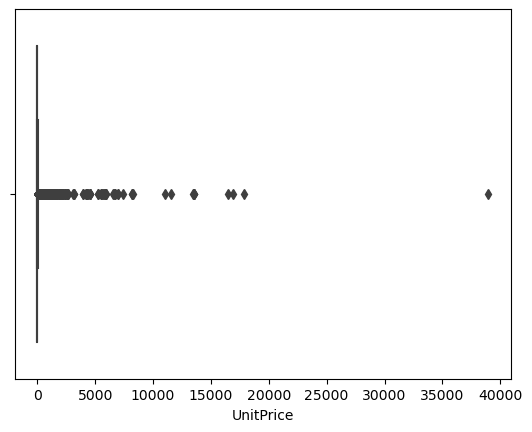

In [28]:
sns.boxplot(x = positivePrices['UnitPrice'])
plt.show()

In [29]:
quartile1 = positivePrices['UnitPrice'].quantile(q=0.25)
quartile3 = positivePrices['UnitPrice'].quantile(q=0.75)
IQR = quartile3 - quartile1
print(quartile1, quartile3, IQR)
lower_limit = quartile1 - (1.5 * IQR)
upper_limit = quartile3 + (1.5 * IQR)
print(lower_limit, upper_limit)

1.25 4.13 2.88
-3.0700000000000003 8.45


In [30]:
price_outliers = positivePrices[positivePrices['UnitPrice'] > upper_limit]
sorted_outliers = price_outliers.sort_values(by=['UnitPrice'])
sorted_outliers.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
417524,539434,21408,SPOTTY PINK DUCK DOORSTOP,1,2010-12-17 14:41:00,8.47,NaN,239.0,United Kingdom
418687,539437,71053,WHITE METAL LANTERN,1,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom
418678,539437,47566B,TEA TIME PARTY BUNTING,1,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom
418677,539437,47566,PARTY BUNTING,1,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom
418675,539437,47504K,ENGLISH ROSE GARDEN SECATEURS,1,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom
409217,537237,21407,BROWN CHECK CAT DOORSTOP,1,2010-12-06 09:58:00,8.47,NaN,69.0,United Kingdom
418666,539437,35953,FOLKART STAR CHRISTMAS DECORATIONS,1,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom
418648,539437,22960,JAM MAKING SET WITH JARS,2,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom
409194,537237,21218,RED SPOTTY BISCUIT TIN,1,2010-12-06 09:58:00,8.47,NaN,69.0,United Kingdom
418628,539437,22862,LOVE HEART NAPKIN BOX,1,2010-12-17 14:54:00,8.47,NaN,241.0,United Kingdom


In [31]:
sorted_outliers.tail(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
446047,546650,DOT,DOTCOM POSTAGE,1,2011-03-15 14:17:00,111.79,NaN,866.0,United Kingdom
439396,544089,DOT,DOTCOM POSTAGE,1,2011-02-15 17:51:00,111.86,NaN,672.0,United Kingdom
484186,560573,M,Manual,1,2011-07-19 14:47:00,112.35,NaN,2276.0,United Kingdom
193200,C560572,M,Manual,-1,2011-07-19 14:45:00,112.35,17065.0,17065.0,United Kingdom
420871,539718,DOT,DOTCOM POSTAGE,1,2010-12-21 13:06:00,112.37,NaN,277.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
412295,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,118.0,United Kingdom
422887,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,334.0,United Kingdom
422886,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,333.0,United Kingdom
535682,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,3653.0,United Kingdom


In [32]:
sorted_outliers.tail(1000).StockCode.unique()

array(['DOT', 'M', 'D', 22655, 22656, 22823, 'S', 'POST', 'BANK CHARGES',
       22827, 22828, 'C2', 22826, 'AMAZONFEE', 'CRUK', 22502, 'B'],
      dtype=object)

In [33]:
sorted_outliers[sorted_outliers['StockCode'] == 'CRUK']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
234352,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,14096.0,United Kingdom
242041,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,14096.0,United Kingdom
246653,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,14096.0,United Kingdom
274723,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,14096.0,United Kingdom
289277,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,14096.0,United Kingdom
311237,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,14096.0,United Kingdom
265371,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,14096.0,United Kingdom
299013,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,14096.0,United Kingdom
342910,C575606,CRUK,CRUK Commission,-1,2011-11-10 12:37:00,517.51,14096.0,14096.0,United Kingdom
323251,C573575,CRUK,CRUK Commission,-1,2011-10-31 14:09:00,606.00,14096.0,14096.0,United Kingdom


In [34]:
invalidStockCodes = ['DOT', 'M', 'D', 'S', 'POST', 'BANK CHARGES', 'C2', 'AMAZONFEE', 'CRUK', 'B']
clean = positivePrices[~positivePrices['StockCode'].isin(invalidStockCodes)]
len(clean)

536497

In [35]:
clean.sort_values(by=['UnitPrice']).tail(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
407455,536592,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,1,2010-12-01 17:06:00,25.49,NaN,14.0,United Kingdom
414465,538153,22424,ENAMEL BREAD BIN CREAM,1,2010-12-09 16:31:00,25.49,NaN,180.0,United Kingdom
410217,537240,85066,CREAM SWEETHEART MINI CHEST,2,2010-12-06 10:08:00,25.49,NaN,70.0,United Kingdom
417072,538880,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-14 15:52:00,25.49,NaN,218.0,United Kingdom
414422,538153,21258,VICTORIAN SEWING BOX LARGE,6,2010-12-09 16:31:00,25.49,NaN,180.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
52581,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.00,14842.0,14842.0,United Kingdom
22043,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.00,16607.0,16607.0,United Kingdom
24190,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,2010-12-17 15:11:00,295.00,16607.0,16607.0,United Kingdom
159239,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,15098.0,United Kingdom


In [37]:
clean.sort_values(by='Quantity').tail(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country
163628,556917,21121,SET/10 RED POLKADOT PARTY CANDLES,288,2011-06-15 13:37:00,1.06,12415.0,12415.0,Australia
40379,541711,21917,SET 12 KIDS WHITE CHALK STICKS,288,2011-01-21 11:18:00,0.36,14646.0,14646.0,Netherlands
23823,539338,21210,SET OF 72 RETROSPOT PAPER DOILIES,288,2010-12-17 10:54:00,1.45,17404.0,17404.0,Sweden
233790,565285,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,288,2011-09-02 11:34:00,2.75,16013.0,16013.0,United Kingdom
39030,541570,21121,SET/10 RED POLKADOT PARTY CANDLES,288,2011-01-19 12:34:00,1.06,14646.0,14646.0,Netherlands
...,...,...,...,...,...,...,...,...,...
63331,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,18087.0,United Kingdom
146796,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,13135.0,United Kingdom
315541,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,12901.0,United Kingdom
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,12346.0,United Kingdom


In [49]:
clean.to_csv('cleanData.csv', index=False)